# Tutorial 2: specifying constraints in iDDN
In many problems, there are some biological knowledge about the (non)existence of edges between nodes and iDDN is able to incorporate this information during the optimization process.

We start by importing some basic packages. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from iddn_data import load_data  # Load example data and images

%load_ext autoreload
%autoreload 2

We use the same example data as the previous tutorial.


In [2]:
example = load_data.load_example()

We give a simple example below. which is a two-layer network. We allow edges among TFs, and do not allow edges among non-TF genes.


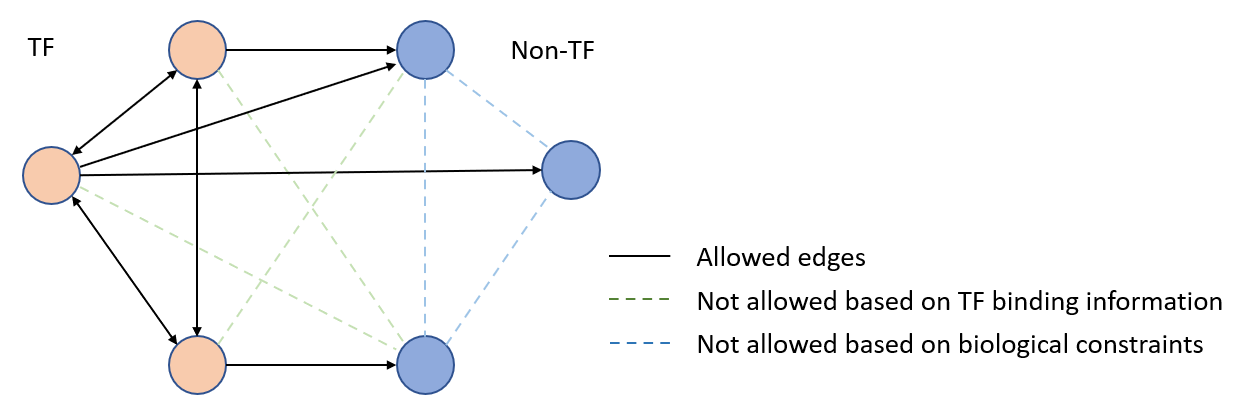

In [3]:
Image(filename=load_data.get_image_path("constraints_cartoon.png"))

In this tutorial, for illustration purpose, we assume there are no edges among TFs and miRNAs. We need to create a matrix to represent these constraints. As we have 150 nodes (mRNA + TF + miRNA), we need to create a NumPy array of shape 150 by 150, where each row or column represent a node and the ordering is the same as the input data. If we allow an edge between two nodes $[i,j]$ , we assign value 1 to the corresponding elements in the matrix. If we do not allow an edge, we set as 0. If the constraints matrix is not provided, iDDN will allow any pairs of edges. An example constraints matrix `dep_mat` is given below. 

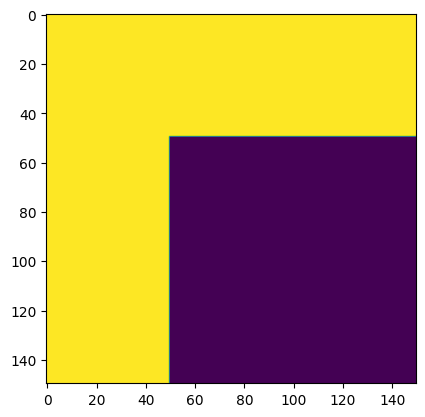

In [4]:
dep_mat = example["dep_mat"]
plt.imshow(dep_mat)

To better understand this matrix, consider the figure below. The constraints matrix is divided to 9 blocks, and the shaded blocks represent the allowed interactions among nodes.

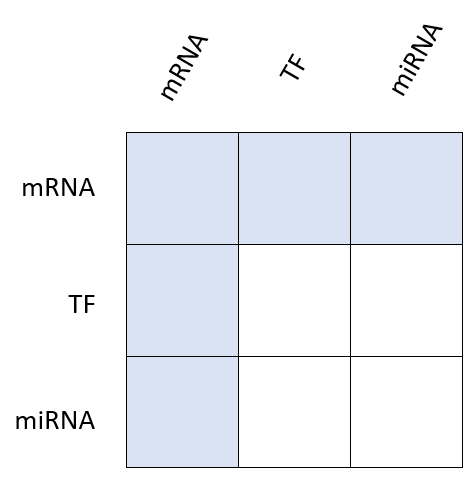

In [5]:
Image(filename=load_data.get_image_path("constraints.png"))

Usually, for different applications, the constraints matrix can be quite different, and there is no universally applicable choice, and it may require trial and error to find the most suitable constraints. In addition, although the constraints here looks to have some simple pattern, iDDN supports arbitrary choice of edges to be excluded. For example, we may know some TFs are not likely to bind to some genes, we may get a more fine-grained constraint matrix. This is illustrated in the figure below, which shows three different levels of constraints. The dashed lines shows the edges not allowed.

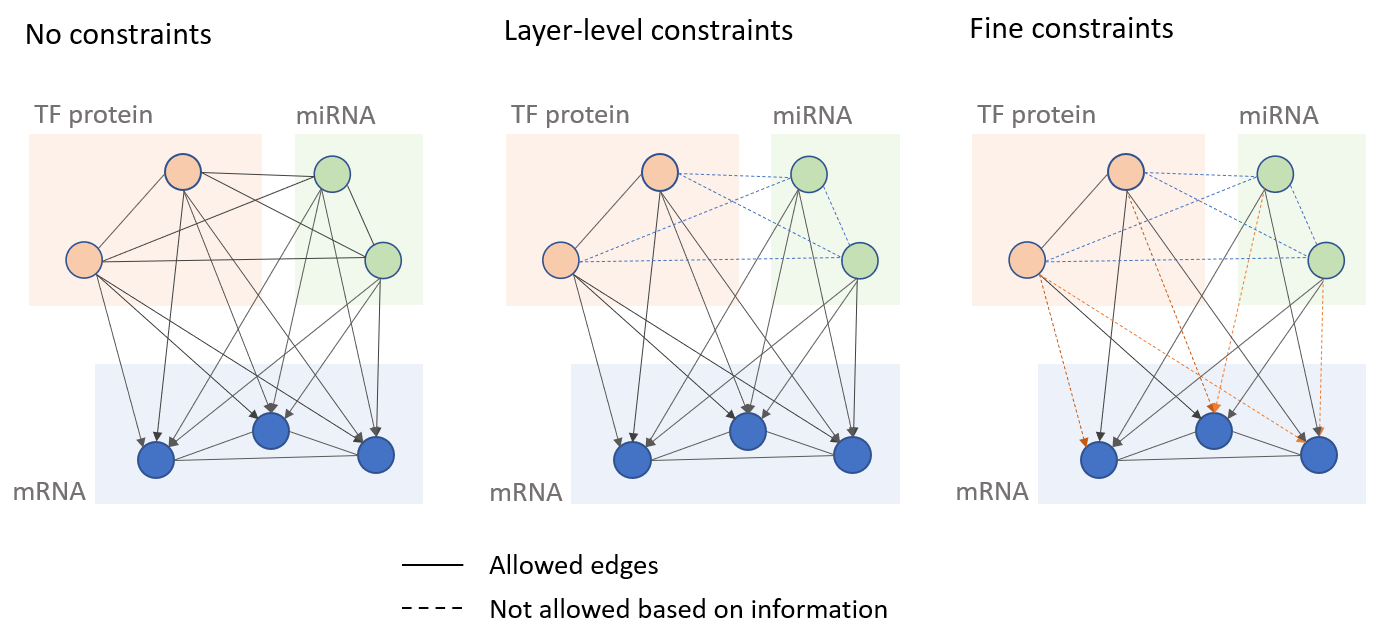

In [6]:
Image(filename=load_data.get_image_path("constraints_fine.png"))

Also note that although the above constraints are symmetric, we can use an **asymmetric** constraints matrix to represent regulatory directions. For example, TFs may regulate mRNAs, but the opposite is not allowed. In the constraints matrix, if element $[i,j]$ of the matrix is 1, it means we allow an edge from node $i$ to node $j$. Therefore, we can modify the constraints matrix to allow edges from TFs or miRNAs to mRNA, but not the opposite. The figure below is the new constraint matrix, which is more consistent with the network topology shown before.  

In the following, we will still use the symmetric version of the constraints.


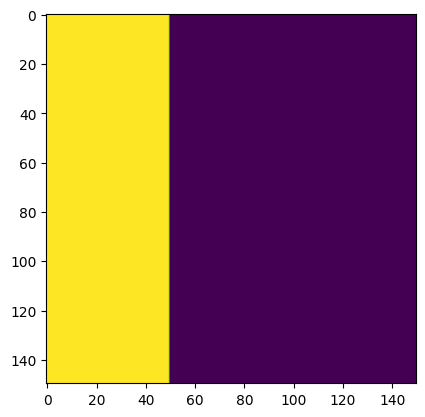

In [7]:
dep_mat_asymmetric = np.copy(dep_mat)
dep_mat_asymmetric[:, 50:] = 0
plt.imshow(dep_mat_asymmetric)

## Next steps
In the following tutorials, we will learn how to visualize the estimated networks with the built-in functions in iDDN.